In [1]:
import numpy as np
import sklearn
import tensorflow as tf
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(42)
Colors = ['#004165','#dc4200',  '#69be28', '#f0be00', '#0cc6de', '#bed600', '#006983', '2b580c', '639a67']
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

Project_Root_Directory = "."
Section_Id             = "Training Deep Neural Networks"
Images_Path            = os.path.join(Project_Root_Directory, "images", Section_Id)
os.makedirs(Images_Path, exist_ok =True)

def save_pictures(fig_id, tight_layout =True, fig_extension ="png", resolution = 300):
    path = os.path.join(Images_Path, fig_id+ "."+ fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)
    

# Vanishing/Exploding Gradients Problem

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

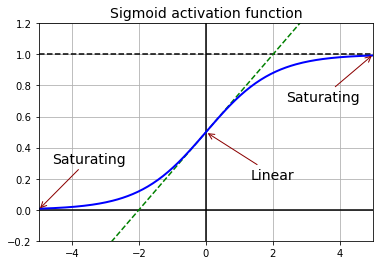

In [8]:
a = 5
z = np.linspace(-a, a, 200)

plt.plot([-a, a], [0, 0], 'k-')
plt.plot([-a, a], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-a, a], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2)
props = dict(arrowstyle = "->", color ="darkred")
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-a, a, -0.2, 1.2])

plt.show()

In [9]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [13]:
keras.layers.Dense(10, activation = "relu", kernel_initializer ="he_normal")
init = keras.initializers.VarianceScaling(scale =2., mode ="fan_avg", distribution = "uniform")
keras.layers.Dense(10, activation ="relu", kernel_initializer =init)

In [14]:
def leaky_relu(z, alpha =0.01):
    return np.maximum(alpha*z, z)

(-5.0, 5.0, -0.5, 4.2)

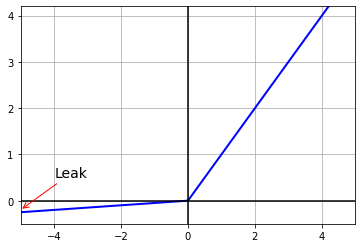

In [19]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth =2)
plt.plot([-a, a], [0,0], "k-")
plt.plot([0,0], [-0.5, 4.2], 'k-')
plt.grid()
plt.annotate("Leak", xytext=(-3.5, .5), xy =(-a, -.2), arrowprops = dict(arrowstyle = "->", color ="red" ), 
             fontsize =14, ha ="center")
plt.axis([-a,a, -0.5, 4.2])

In [24]:
[ i for i in dir(keras.layers) if "relu" in i.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [25]:
[ i for i in dir(keras.activations) if not i.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [30]:
# using the Leaky ReLU:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full /255
X_test = X_test /255
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28,28]),
    keras.layers.Dense(300, kernel_initializer = "he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer = "he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss ="sparse_categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=1e-3), metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs =10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8416 - accuracy: 0.7247 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7053 - accuracy: 0.7637 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6325 - accuracy: 0.7908 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5992 - accuracy: 0.8021 - val_loss: 0.5582 - val_accuracy: 0.8198
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5624 - accuracy: 0.8142 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5379 - accuracy: 0.8218 - val_loss: 0.5156 - val_accuracy:

In [34]:
# using the PReLU:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28,28]),
    keras.layers.Dense(300, kernel_initializer ="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer ="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation ="softmax"),
])
model.compile(loss= "sparse_categorical_crossentropy", optimizer =keras.optimizers.SGD(lr =1e3), metrics =["accuracy"])
history =model.fit(X_train, y_train, epochs =10, validation_data =(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1002 - val_loss: nan - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1004 - val_loss: nan - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.1030 - val_loss: nan - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1008 - val_loss: nan - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0914
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.1034 - val_loss: nan - val_accuracy: 0.0914
Epoch 8/10
1719/1719 [============

In [35]:
# ELU 

def elu(z, alpha =1):
    return np.where(z<0, alpha*(np.exp(z)-1),z)

(-5.0, 5.0, -2.2, 3.2)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


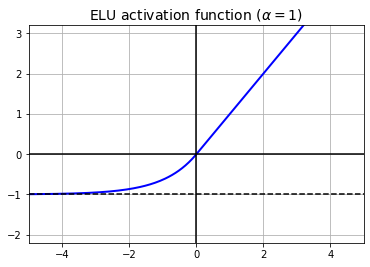

In [41]:
plt.plot(z,elu(z), "b-", linewidth =2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])



## Batch Normalization

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation ="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation ="relu"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation ="softmax"), 
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [45]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_1/gamma:0', True),
 ('batch_normalization_1/beta:0', True),
 ('batch_normalization_1/moving_mean:0', False),
 ('batch_normalization_1/moving_variance:0', False)]

In [49]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=1e-2), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data =(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6730 - accuracy: 0.7731 - val_loss: 0.3789 - val_accuracy: 0.8674
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4065 - accuracy: 0.8541 - val_loss: 0.3447 - val_accuracy: 0.8782
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3641 - accuracy: 0.8699 - val_loss: 0.3411 - val_accuracy: 0.8758
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3290 - accuracy: 0.8795 - val_loss: 0.3235 - val_accuracy: 0.8862
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3157 - accuracy: 0.8851 - val_loss: 0.3098 - val_accuracy: 0.8884
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2857 - accuracy: 0.8952 - val_loss: 0.3084 - val_accuracy: 0.8910
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2735 - accuracy: 0.9011 - val_loss: 0.3094 - val_ac